In [15]:
import pandas as pd
import numpy as np

# Load the dataset from your local machine
file_path = 'C:\\Users\\Rick\\OneDrive\\Documenten\\HBO-ICT HAN\\Jaar 4\\Minor DDM\\Data mining\\wine.csv'
wine_data = pd.read_csv(file_path)

wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Rick\\OneDrive\\Documenten\\HBO-ICT HAN\\Jaar 4\\Minor DDM\\Data mining\\wine.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(wine_data.head())

# Check for data types (categorical variables often include the target)
print("\nData types of each column:")
print(wine_data.dtypes)

# Check for unique values in each column (target variable usually has few unique values)
print("\nNumber of unique values in each column:")
print(wine_data.nunique())

# Check the distribution of values in each column
print("\nValue counts of the first column (potential target variable):")
print(wine_data.iloc[:, 0].value_counts())


First few rows of the dataset:
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  

Data types of each column:
Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                   

In [11]:
catType = pd.CategoricalDtype(categories=[1, 2, 3], ordered=False)
wine_data["Wine"] = wine_data["Wine"].astype(catType)
wine_data["Wine"]

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: category
Categories (3, int64): [1, 2, 3]

In [16]:
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values


testSet1 = np.arange(1, 6)
testSet2 = np.arange(1, 6) * 10


print(f"Normalized testSet1: {normalize(testSet1)}\n")

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]



In [19]:
excluded = ["Wine"]  # list of columns to exclude
# X = cleanDF.loc[:, ~cleanDF.columns.isin(excluded)]
X = wine_data.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[['Flavanoids', 'Proline', 'OD', 'Alcohol']].describe()

,Flavanoids,Proline,OD,Alcohol
count,178.000000,178.000000,178.000000,178.000000
mean,0.356386,0.334446,0.491460,0.518584
std,0.210730,0.224613,0.260070,0.213639
min,0.000000,0.000000,0.000000,0.000000
25%,0.182489,0.158702,0.244505,0.350658
50%,0.378692,0.282097,0.553114,0.531579
75%,0.534810,0.504280,0.695971,0.696711
max,1.000000,1.000000,1.000000,1.000000


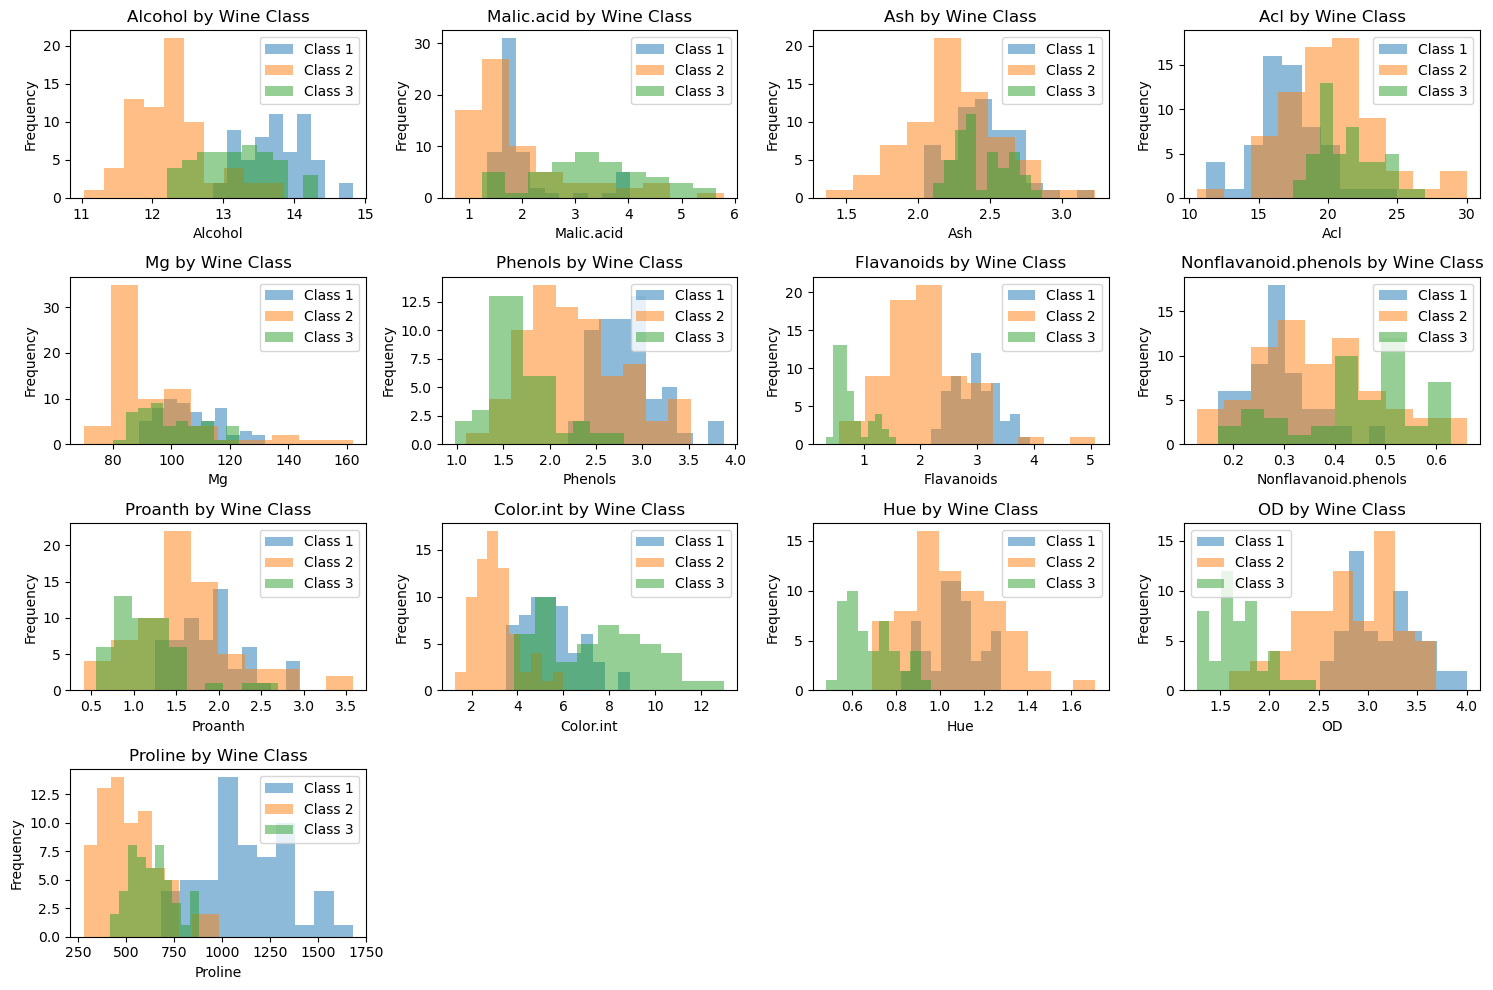

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Rick\\OneDrive\\Documenten\\HBO-ICT HAN\\Jaar 4\\Minor DDM\\Data mining\\wine.csv'
wine_data = pd.read_csv(file_path)

# Define the dependent variable (Wine class)
dependent_variable = 'Wine'
independent_variables = wine_data.columns[1:]  # All columns except the Wine class

# Create subplots for each independent variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(independent_variables, 1):
    plt.subplot(4, 4, i)
    for wine_class in wine_data[dependent_variable].unique():
        subset = wine_data[wine_data[dependent_variable] == wine_class]
        plt.hist(subset[feature], bins=10, alpha=0.5, label=f'Class {wine_class}')
    
    plt.title(f'{feature} by Wine Class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


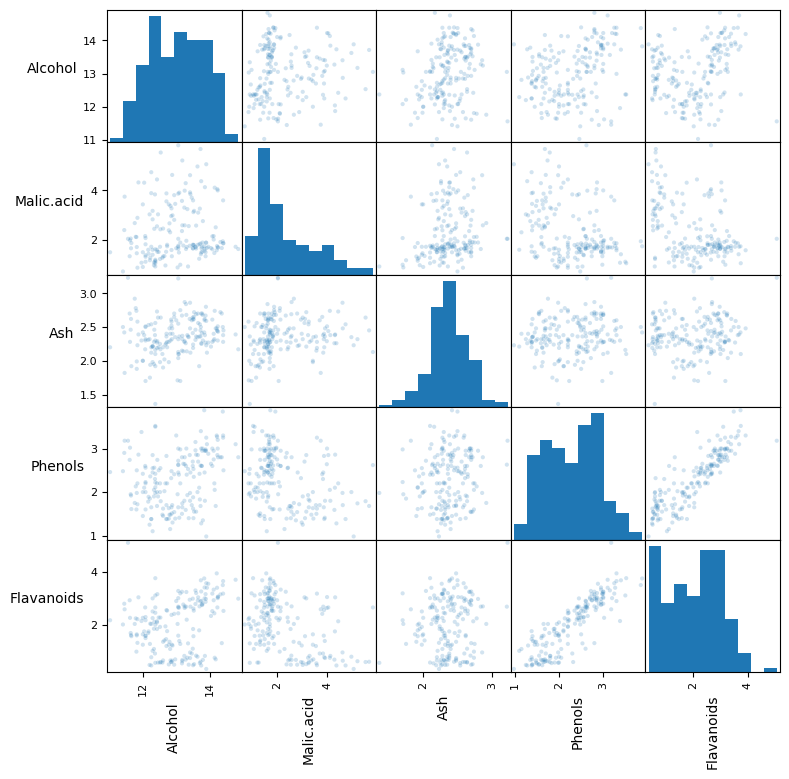

Accuracy: 0.9722222222222222
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'C:\\Users\\Rick\\OneDrive\\Documenten\\HBO-ICT HAN\\Jaar 4\\Minor DDM\\Data mining\\wine.csv'
wine_data = pd.read_csv(file_path)

# Select relevant columns for scatter matrix (You can modify these based on importance)
# Let's use 'Alcohol', 'Malic.acid', 'Ash', 'Phenols', and 'Flavanoids' as relevant columns
relevant_columns = ['Alcohol', 'Malic.acid', 'Ash', 'Phenols', 'Flavanoids']

# Scatter matrix for selected relevant columns
selDF = wine_data[relevant_columns]  # Select relevant features
fig = scatter_matrix(selDF, alpha=0.2, figsize=(8, 8), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# Naive Bayes Classification using the relevant features
X = wine_data[relevant_columns]  # Use only relevant columns as features
y = wine_data['Wine']            # Dependent variable (wine class)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.0


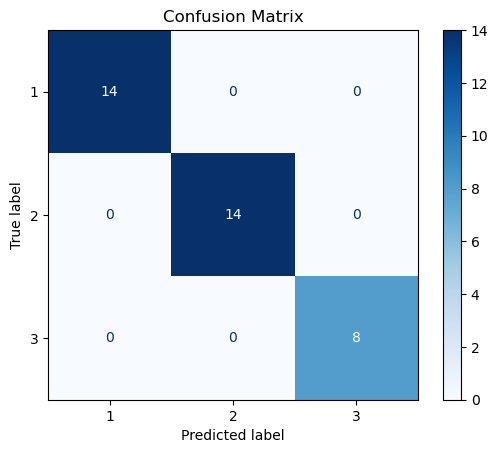

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load the dataset
file_path = 'C:\\Users\\Rick\\OneDrive\\Documenten\\HBO-ICT HAN\\Jaar 4\\Minor DDM\\Data mining\\wine.csv'
wine_data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = wine_data.drop(columns=['Wine'])  # Use all columns except the 'Wine' column as features
y = wine_data['Wine']                 # Target (dependent variable)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

